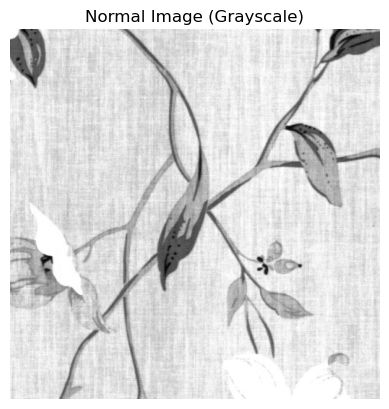

Normal Image - 3x3 Top-left Window Values:
 [[254 254 254]
 [254 254 254]
 [255 255 255]]
Normal Image - Image shape: (512, 512)
Normal Image - Number of channels: 1
-----



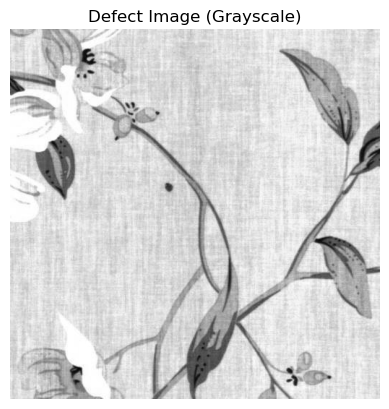

Defect Image - 3x3 Top-left Window Values:
 [[163 180 199]
 [162 171 184]
 [165 165 170]]
Defect Image - Image shape: (512, 512)
Defect Image - Number of channels: 1
-----



In [73]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set paths
normal_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'

# Output folders for grayscale images
normal_gray_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_gray'
defect_gray_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_gray'

# Create grayscale folders if they don't exist
os.makedirs(normal_gray_folder, exist_ok=True)
os.makedirs(defect_gray_folder, exist_ok=True)

# Function to convert all images in a folder to grayscale
def convert_to_grayscale(input_folder, output_folder):
    for file in os.listdir(input_folder):
        img_path = os.path.join(input_folder, file)
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(img_path).convert('L')  # 'L' = grayscale
            img.save(os.path.join(output_folder, file))

# Convert all images
convert_to_grayscale(normal_folder, normal_gray_folder)
convert_to_grayscale(defect_folder, defect_gray_folder)

# Display first grayscale image from each folder
def display_and_print_details(folder_path, title):
    first_image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = Image.open(first_image_path)
    img_array = np.array(img)

    # Display image
    plt.imshow(img_array, cmap='gray')
    plt.title(f"{title} (Grayscale)")
    plt.axis('off')
    plt.show()

    # Print 3x3 pixel values and number of channels
    print(f"{title} - 3x3 Top-left Window Values:\n", img_array[:3, :3])
    print(f"{title} - Image shape: {img_array.shape}")
    print(f"{title} - Number of channels: {1 if len(img_array.shape)==2 else img_array.shape[2]}")
    print("-----\n")

# Apply display and info function
display_and_print_details(normal_gray_folder, "Normal Image")
display_and_print_details(defect_gray_folder, "Defect Image")


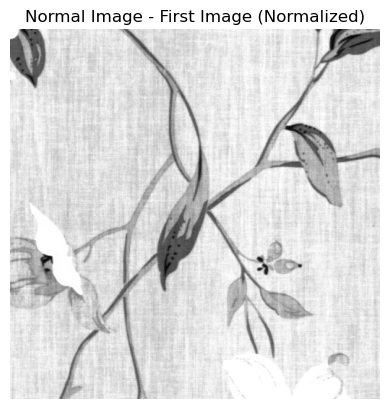

Normal Image - 3x3 Top-left Window (Normalized) Values:
 [[0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843]
 [1.         1.         1.        ]]
Normal Image - Image shape: (512, 512)
Normal Image - Number of channels: 1
-----

Normal Image - Total images processed and saved: 320



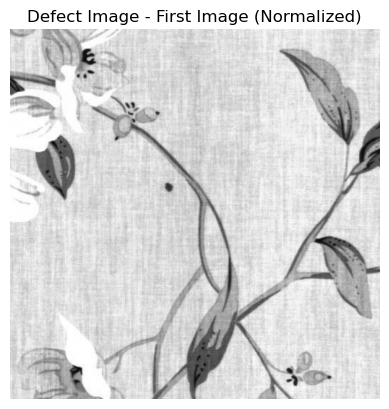

Defect Image - 3x3 Top-left Window (Normalized) Values:
 [[0.63921569 0.70588235 0.78039216]
 [0.63529412 0.67058824 0.72156863]
 [0.64705882 0.64705882 0.66666667]]
Defect Image - Image shape: (512, 512)
Defect Image - Number of channels: 1
-----

Defect Image - Total images processed and saved: 32



In [77]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Set paths to final grayscale image folders
normal_gray_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_gray'
defect_gray_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_gray'

# Output folders for normalized images
normal_normalized_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_normalized'
defect_normalized_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_normalized'

# Create normalized folders if they don't exist
os.makedirs(normal_normalized_folder, exist_ok=True)
os.makedirs(defect_normalized_folder, exist_ok=True)

# Function to normalize grayscale image
def normalize_image(image_array):
    return image_array / 255.0

# Function to process all images in a folder
def process_and_save_all_images(input_folder, output_folder, title):
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]
    
    if not image_files:
        print(f"No image files found in {input_folder}")
        return
    
    for i, file_name in enumerate(image_files):
        file_path = os.path.join(input_folder, file_name)
        img = Image.open(file_path).convert('L')  # Ensure it's grayscale
        img_array = np.array(img)

        # Normalize
        normalized_array = normalize_image(img_array)

        # Save normalized image (convert back to 8-bit before saving)
        normalized_img = Image.fromarray((normalized_array * 255).astype(np.uint8))
        normalized_img.save(os.path.join(output_folder, file_name))

        # Display and print info for the first image only
        if i == 0:
            plt.imshow(normalized_array, cmap='gray')
            plt.title(f"{title} - First Image (Normalized)")
            plt.axis('off')
            plt.show()
            
            print(f"{title} - 3x3 Top-left Window (Normalized) Values:\n", normalized_array[:3, :3])
            print(f"{title} - Image shape: {normalized_array.shape}")
            print(f"{title} - Number of channels: {1 if len(normalized_array.shape)==2 else normalized_array.shape[2]}")
            print("-----\n")

    print(f"{title} - Total images processed and saved: {len(image_files)}\n")

# Process both normal and defect folders
process_and_save_all_images(normal_gray_folder, normal_normalized_folder, "Normal Image")
process_and_save_all_images(defect_gray_folder, defect_normalized_folder, "Defect Image")


Processing Normal Images...

Found 320 images in C:\Users\Global\Fabric project\WFDD\Pink flower\normal_normalized...

Processing 'img1.png'
PSNR: 38.99 dB, SSIM: 0.9476

Successfully saved: img1.png
Processing 'img10.png'
PSNR: 38.39 dB, SSIM: 0.9417

Successfully saved: img10.png
Processing 'img100.png'
PSNR: 38.38 dB, SSIM: 0.9416

Successfully saved: img100.png
Processing 'img101.png'
PSNR: 40.07 dB, SSIM: 0.9507

Successfully saved: img101.png
Processing 'img102.png'
PSNR: 40.30 dB, SSIM: 0.9567

Successfully saved: img102.png
Processing 'img103.png'
PSNR: 40.64 dB, SSIM: 0.9632

Successfully saved: img103.png
Processing 'img104.png'
PSNR: 40.47 dB, SSIM: 0.9613

Successfully saved: img104.png
Processing 'img105.png'
PSNR: 40.53 dB, SSIM: 0.9649

Successfully saved: img105.png
Processing 'img106.png'
PSNR: 37.92 dB, SSIM: 0.9319

Successfully saved: img106.png
Processing 'img107.png'
PSNR: 38.60 dB, SSIM: 0.9452

Successfully saved: img107.png
Processing 'img108.png'
PSNR: 43.50 d

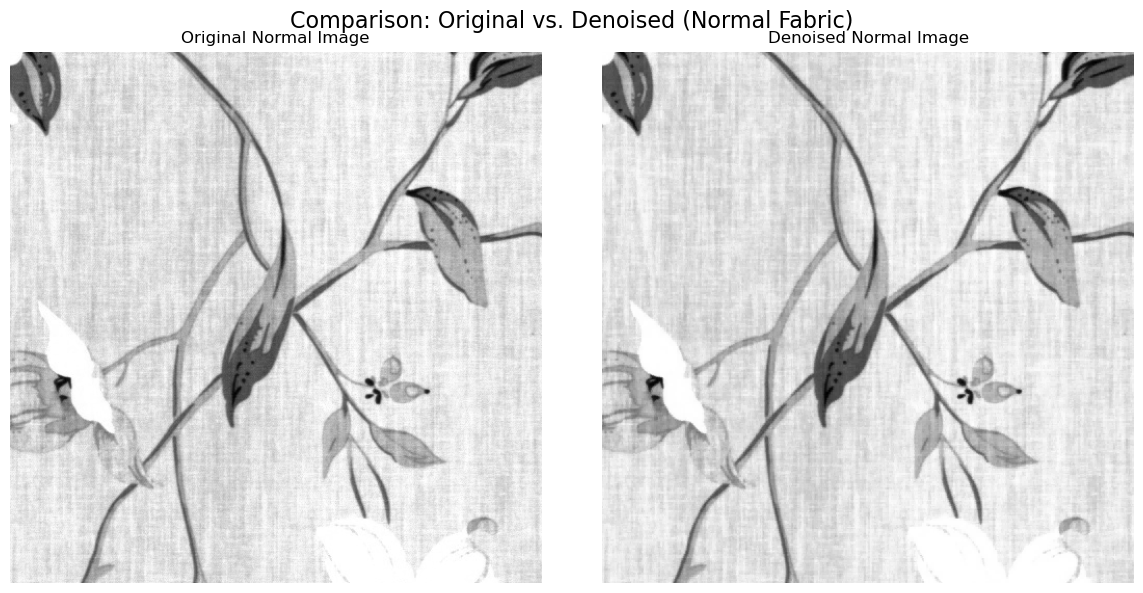

In [79]:
import os
import cv2
import numpy as np
from skimage import restoration, img_as_float, img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# ===============================
# Step 1: Define Folder Paths
# ===============================
normal_input_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_normalized'
defect_input_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_normalized'

normal_output_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\denoised_normal'
defect_output_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\denoised_defect'

# Create output folders if they don't exist
os.makedirs(normal_output_folder, exist_ok=True)
os.makedirs(defect_output_folder, exist_ok=True)

# ===============================
# Step 2: Define a Function to Process a Folder
# ===============================
def process_folder(input_folder, output_folder):
    """
    Process each image in the input folder (already normalized grayscale images):
    - Apply wavelet denoising using BayesShrink.
    - Compute PSNR and SSIM metrics.
    - Save the denoised image to the output folder.
    """
    # Define valid image extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    print(f"Found {len(files)} images in {input_folder}...\n")
    
    # Check if any image files are found
    if len(files) == 0:
        print(f"No image files found in folder: {input_folder}")
        return
    
    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)
        
        # Load the normalized grayscale image.
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Error reading image: {file}. Skipping...")
            continue
        
        img_float = img_as_float(img)  # Now pixel values are in the range [0, 1]
        
        # Apply Wavelet Denoising using BayesShrink
        denoised = restoration.denoise_wavelet(
            img_float, 
            method='BayesShrink', 
            mode='soft', 
            rescale_sigma=True
        )
        
        # Compute PSNR and SSIM
        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)
        
        # Print PSNR and SSIM values
        print(f"Processing '{file}'")
        print(f"PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}\n")
        
        # Clip and save the denoised image
        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        
        # Saving the denoised image
        try:
            success = cv2.imwrite(output_path, denoised_uint8)
            if success:
                print(f"Successfully saved: {file}")
            else:
                print(f"Failed to save: {file}")
        except Exception as e:
            print(f"Error saving image {file}: {e}")

# ===============================
# Step 6: Process Both Folders
# ===============================
print("Processing Normal Images...\n")
process_folder(normal_input_folder, normal_output_folder)
print("Processing Defective Images...\n")
process_folder(defect_input_folder, defect_output_folder)

# ===============================
# Step 7: Optional - Visualize a Sample Comparison for Normal Images
# ===============================
# For demonstration, display the first image from the normal folder before and after denoising.
sample_file = os.listdir(normal_input_folder)[0]
sample_input_path = os.path.join(normal_input_folder, sample_file)
sample_output_path = os.path.join(normal_output_folder, sample_file)

orig_sample = cv2.imread(sample_input_path, cv2.IMREAD_GRAYSCALE)
denoised_sample = cv2.imread(sample_output_path, cv2.IMREAD_GRAYSCALE)

# Show before and after denoising images
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orig_sample, cmap='gray')
plt.title("Original Normal Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_sample, cmap='gray')
plt.title("Denoised Normal Image")
plt.axis('off')

plt.suptitle("Comparison: Original vs. Denoised (Normal Fabric)", fontsize=16)
plt.tight_layout()
plt.show()


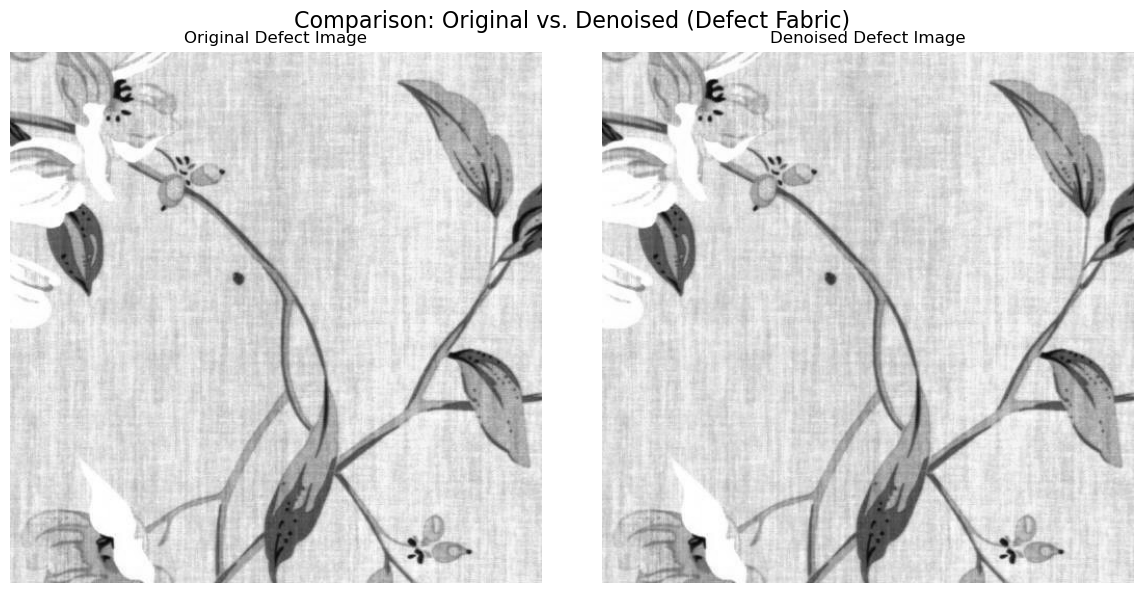

In [81]:
# ===============================
# Step 7 (continued): Visualize a Sample Comparison for Defect Images
# ===============================
# For demonstration, display the first image from the defect folder before and after denoising.
sample_defect_file = os.listdir(defect_input_folder)[0]
sample_defect_input_path = os.path.join(defect_input_folder, sample_defect_file)
sample_defect_output_path = os.path.join(defect_output_folder, sample_defect_file)

orig_defect_sample = cv2.imread(sample_defect_input_path, cv2.IMREAD_GRAYSCALE)
denoised_defect_sample = cv2.imread(sample_defect_output_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orig_defect_sample, cmap='gray')
plt.title("Original Defect Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_defect_sample, cmap='gray')
plt.title("Denoised Defect Image")
plt.axis('off')

plt.suptitle("Comparison: Original vs. Denoised (Defect Fabric)", fontsize=16)
plt.tight_layout()
plt.show()


In [83]:
# ===============================
# Step 8: Modified process_folder to return PSNR and SSIM values
# ===============================
def process_folder_with_metrics(input_folder, output_folder):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    psnr_values = []
    ssim_values = []

    for file in files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)

        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        img_float = img_as_float(img)

        denoised = restoration.denoise_wavelet(
            img_float,
            method='BayesShrink',
            mode='soft',
            rescale_sigma=True
        )

        psnr_value = psnr(img_float, denoised, data_range=1.0)
        ssim_value = ssim(img_float, denoised, data_range=1.0)

        print(f"Processing '{file}'")
        print(f"PSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}\n")

        denoised_clipped = np.clip(denoised, 0, 1)
        denoised_uint8 = img_as_ubyte(denoised_clipped)
        cv2.imwrite(output_path, denoised_uint8)

        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

    return psnr_values, ssim_values

# ===============================
# Step 9: Call Modified Function for Each Folder
# ===============================
print("=== Processing Normal Folder ===")
normal_psnr, normal_ssim = process_folder_with_metrics(normal_input_folder, normal_output_folder)

print("\n=== Processing Defect Folder ===")
defect_psnr, defect_ssim = process_folder_with_metrics(defect_input_folder, defect_output_folder)

# ===============================
# Step 10: Print Average Metrics
# ===============================
print("\n===== Summary =====")
print(f"Normal Folder - Avg PSNR: {np.mean(normal_psnr):.2f} dB, Avg SSIM: {np.mean(normal_ssim):.4f}")
print(f"Defect Folder - Avg PSNR: {np.mean(defect_psnr):.2f} dB, Avg SSIM: {np.mean(defect_ssim):.4f}")


=== Processing Normal Folder ===
Processing 'img1.png'
PSNR: 38.99 dB, SSIM: 0.9476

Processing 'img10.png'
PSNR: 38.39 dB, SSIM: 0.9417

Processing 'img100.png'
PSNR: 38.38 dB, SSIM: 0.9416

Processing 'img101.png'
PSNR: 40.07 dB, SSIM: 0.9507

Processing 'img102.png'
PSNR: 40.30 dB, SSIM: 0.9567

Processing 'img103.png'
PSNR: 40.64 dB, SSIM: 0.9632

Processing 'img104.png'
PSNR: 40.47 dB, SSIM: 0.9613

Processing 'img105.png'
PSNR: 40.53 dB, SSIM: 0.9649

Processing 'img106.png'
PSNR: 37.92 dB, SSIM: 0.9319

Processing 'img107.png'
PSNR: 38.60 dB, SSIM: 0.9452

Processing 'img108.png'
PSNR: 43.50 dB, SSIM: 0.9804

Processing 'img109.png'
PSNR: 40.62 dB, SSIM: 0.9654

Processing 'img11.png'
PSNR: 38.70 dB, SSIM: 0.9481

Processing 'img110.png'
PSNR: 38.34 dB, SSIM: 0.9421

Processing 'img111.png'
PSNR: 40.47 dB, SSIM: 0.9595

Processing 'img112.png'
PSNR: 40.11 dB, SSIM: 0.9523

Processing 'img113.png'
PSNR: 40.04 dB, SSIM: 0.9508

Processing 'img114.png'
PSNR: 38.35 dB, SSIM: 0.9400


In [91]:
pip install --user albumentations


  Using cached albumentations-2.0.5-py3-none-any.whl.metadata (41 kB)
  Using cached pydantic-2.11.3-py3-none-any.whl.metadata (65 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached albumentations-2.0.5-py3-none-any.whl (290 kB)
Using cached albucore-0.0.23-py3-none-any.whl (14 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached pydantic-2.11.3-py3-none-any.whl (443 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
import shutil

# Define the source folders for normal images
normal_original_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\denoised_normal'
normal_augmented_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\augmented_normal'

# Define the source folders for defect images
defect_original_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\denoised_defect'
defect_augmented_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\augmented_defect'

# Define the final destination folders
final_normal_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_pink_normal'
final_defect_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_pink_defect'

# Create the final folders if they do not exist
os.makedirs(final_normal_folder, exist_ok=True)
os.makedirs(final_defect_folder, exist_ok=True)

def merge_folders(source_folders, destination_folder):
    """
    Copy all images from each folder in source_folders into destination_folder.
    """
    for folder in source_folders:
        image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for file in image_files:
            src_path = os.path.join(folder, file)
            dst_path = os.path.join(destination_folder, file)
            # If needed, you can check for duplicates here.
            shutil.copy2(src_path, dst_path)
    print(f"✅ Merged {', '.join(source_folders)} into {destination_folder}")

# Merge normal images from normal_normalized and normal_augmented into final_normal_folder
merge_folders([normal_original_folder, normal_augmented_folder], final_normal_folder)

# Merge defect images from defect_normalized and defect_augmented into final_defect_folder
merge_folders([defect_original_folder, defect_augmented_folder], final_defect_folder)


✅ Merged C:\Users\Global\Fabric project\WFDD\Pink flower\denoised_normal, C:\Users\Global\Fabric project\WFDD\Pink flower\augmented_normal into C:\Users\Global\Fabric project\WFDD\Pink flower\final_pink_normal
✅ Merged C:\Users\Global\Fabric project\WFDD\Pink flower\denoised_defect, C:\Users\Global\Fabric project\WFDD\Pink flower\augmented_defect into C:\Users\Global\Fabric project\WFDD\Pink flower\final_pink_defect


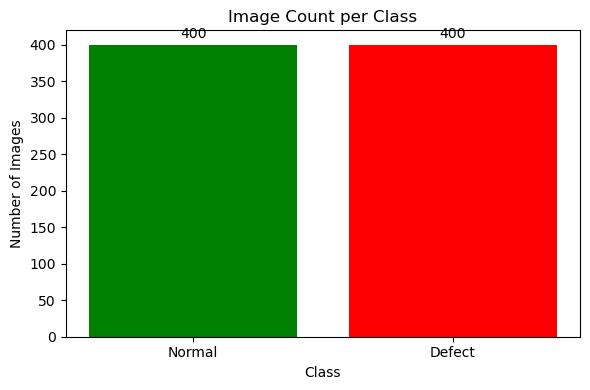

In [43]:
import os
import matplotlib.pyplot as plt

# Paths to your final merged folders
final_normal_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_pink_normal'
final_defect_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_pink_defect'

# Function to count images in a folder
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Count images
normal_count = count_images(final_normal_folder)
defect_count = count_images(final_defect_folder)

# Prepare data for bar chart
classes = ['Normal', 'Defect']
counts = [normal_count, defect_count]
colors = ['green', 'red'] 

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(classes, counts, color=colors)
plt.title('Image Count per Class')
plt.ylabel('Number of Images')
plt.xlabel('Class')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [3]:
# Step 1: Importing Necessary Libraries
import os
import shutil
import hashlib
import matplotlib.pyplot as plt
import cv2

# Step 2: Creating Function for generating Hash value of each Image
def generate_image_hash(image_path):
    """Generate SHA-256 hash for the given image file."""
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    return hashlib.sha256(image_bytes).hexdigest()

# # Step 3: Getting Current Directory (Optional: just to show where you are)
# current_dir = os.getcwd()
# print("Current Working Directory:", current_dir)

# Step 4: Change directory to where your multiple images are located
folder_path =r'C:\Users\Global\Fabric project\WFDD\Pink flower\new_defect'
os.chdir(folder_path)
print("Changed working directory to:", os.getcwd())

# Step 5: Finding length (number) of the images in that folder
all_files = os.listdir(folder_path)
# Filter for common image formats if needed. Adjust extensions accordingly.
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
images = [f for f in all_files if f.lower().endswith(image_extensions)]
print("Total images in folder:", len(images))

# Step 6: Method for generating Hash values of each image & finding duplicates
hash_dict = {}  # This dictionary will map a hash -> list of file names having that hash

for image_file in images:
    image_hash = generate_image_hash(os.path.join(folder_path, image_file))
    if image_hash in hash_dict:
        hash_dict[image_hash].append(image_file)
    else:
        hash_dict[image_hash] = [image_file]

# Identify duplicate groups (those with more than one file name)
duplicates = {h: files for h, files in hash_dict.items() if len(files) > 1}

if duplicates:
    print("\nFound duplicate images:")
    for h, files in duplicates.items():
        print(f"Hash: {h}\nFiles: {files}\n")
else:
    print("\nNo duplicate images found.")

# Step 7: Visualizing (display one sample duplicate image from each duplicate group)
if duplicates:
    print("Displaying one sample image from each duplicate group:")
    plt.figure(figsize=(12, len(duplicates) * 4))
    for idx, (h, files) in enumerate(duplicates.items()):
        # Read the first image in the duplicate list with cv2 and convert to RGB for display
        sample_image_path = os.path.join(folder_path, files[0])
        img = cv2.imread(sample_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(duplicates), 1, idx + 1)
        plt.imshow(img_rgb)
        plt.title(f"Duplicate Group (Hash: {h}) with {len(files)} images")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 8: Remove duplicates by copying only one image per unique hash into a new folder.
# Creating a new folder 'normal1' within the same parent directory.
parent_dir = os.path.dirname(folder_path)  # One level above your current folder
destination = os.path.join(parent_dir, 'final_defect_pinkflower')
os.makedirs(destination, exist_ok=True)
print("New folder for filtered images created at:", destination)

# Copy one image per hash into destination (this removes duplicates)
for h, file_list in hash_dict.items():
    # Pick the first file of this hash group
    src_file = os.path.join(folder_path, file_list[0])
    dst_file = os.path.join(destination, file_list[0])
    shutil.copy(src_file, dst_file)

print("Filtered images have been copied to the new folder.")

# Step 9: Verify new folder image count
new_images = [f for f in os.listdir(destination) if f.lower().endswith(image_extensions)]
print("Total unique images in new folder (final_defect_pinkflower):", len(new_images))


Changed working directory to: C:\Users\Global\Fabric project\WFDD\Pink flower\new_defect
Total images in folder: 500

No duplicate images found.
New folder for filtered images created at: C:\Users\Global\Fabric project\WFDD\Pink flower\final_defect_pinkflower
Filtered images have been copied to the new folder.
Total unique images in new folder (final_defect_pinkflower): 500


In [5]:
# Step 1: Importing Necessary Libraries
import os
import shutil
import hashlib
import matplotlib.pyplot as plt
import cv2

# Step 2: Creating Function for generating Hash value of each Image
def generate_image_hash(image_path):
    """Generate SHA-256 hash for the given image file."""
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    return hashlib.sha256(image_bytes).hexdigest()

# # Step 3: Getting Current Directory (Optional: just to show where you are)
# current_dir = os.getcwd()
# print("Current Working Directory:", current_dir)

# Step 4: Change directory to where your multiple images are located
folder_path =r'C:\Users\Global\Fabric project\WFDD\Pink flower\new_normal'
os.chdir(folder_path)
print("Changed working directory to:", os.getcwd())

# Step 5: Finding length (number) of the images in that folder
all_files = os.listdir(folder_path)
# Filter for common image formats if needed. Adjust extensions accordingly.
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
images = [f for f in all_files if f.lower().endswith(image_extensions)]
print("Total images in folder:", len(images))

# Step 6: Method for generating Hash values of each image & finding duplicates
hash_dict = {}  # This dictionary will map a hash -> list of file names having that hash

for image_file in images:
    image_hash = generate_image_hash(os.path.join(folder_path, image_file))
    if image_hash in hash_dict:
        hash_dict[image_hash].append(image_file)
    else:
        hash_dict[image_hash] = [image_file]

# Identify duplicate groups (those with more than one file name)
duplicates = {h: files for h, files in hash_dict.items() if len(files) > 1}

if duplicates:
    print("\nFound duplicate images:")
    for h, files in duplicates.items():
        print(f"Hash: {h}\nFiles: {files}\n")
else:
    print("\nNo duplicate images found.")

# Step 7: Visualizing (display one sample duplicate image from each duplicate group)
if duplicates:
    print("Displaying one sample image from each duplicate group:")
    plt.figure(figsize=(12, len(duplicates) * 4))
    for idx, (h, files) in enumerate(duplicates.items()):
        # Read the first image in the duplicate list with cv2 and convert to RGB for display
        sample_image_path = os.path.join(folder_path, files[0])
        img = cv2.imread(sample_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(duplicates), 1, idx + 1)
        plt.imshow(img_rgb)
        plt.title(f"Duplicate Group (Hash: {h}) with {len(files)} images")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 8: Remove duplicates by copying only one image per unique hash into a new folder.
# Creating a new folder 'normal1' within the same parent directory.
parent_dir = os.path.dirname(folder_path)  # One level above your current folder
destination = os.path.join(parent_dir, 'final_normal_pinkflower')
os.makedirs(destination, exist_ok=True)
print("New folder for filtered images created at:", destination)

# Copy one image per hash into destination (this removes duplicates)
for h, file_list in hash_dict.items():
    # Pick the first file of this hash group
    src_file = os.path.join(folder_path, file_list[0])
    dst_file = os.path.join(destination, file_list[0])
    shutil.copy(src_file, dst_file)

print("Filtered images have been copied to the new folder.")

# Step 9: Verify new folder image count
new_images = [f for f in os.listdir(destination) if f.lower().endswith(image_extensions)]
print("Total unique images in new folder (final_normal_pinkflower):", len(new_images))


Changed working directory to: C:\Users\Global\Fabric project\WFDD\Pink flower\new_normal
Total images in folder: 500

No duplicate images found.
New folder for filtered images created at: C:\Users\Global\Fabric project\WFDD\Pink flower\final_normal_pinkflower
Filtered images have been copied to the new folder.
Total unique images in new folder (final_normal_pinkflower): 500


In [1]:
import os
import cv2
import numpy as np

# Folder paths
input_folder =  r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_normal'  # Replace with your input folder path
output_folder =  r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_normal_3'    # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def grayscale_to_color_normalized(image):
    # Normalize if not already in [0, 1]
    if image.max() > 1.0:
        image = image / 255.0

    # Convert grayscale image to 3-channel normalized image
    color_image = np.stack([image, image, image], axis=-1)
    return color_image

# Process all image files in the folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        # Read image in grayscale
        gray_path = os.path.join(input_folder, filename)
        gray_image = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

        if gray_image is None:
            print(f"Could not read image: {filename}")
            continue

        # Convert to normalized color image
        color_image_normalized = grayscale_to_color_normalized(gray_image)

        # Optional: Save the normalized image as a visual reference (rescaled for saving)
        color_image_to_save = (color_image_normalized * 255).astype(np.uint8)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, color_image_to_save)

        print(f"Processed and saved: {filename}")

print("All images converted successfully.")


Processed and saved: 016227ca8370433eae10f385d04507b9.png
Processed and saved: 025bb728f1204584920cacc56037374e.png
Processed and saved: 0770200bbe2044dfac89fc830663188f.png
Processed and saved: 09a4f700fb3b4595a1138f800dbbc4e5.png
Processed and saved: 0a815085cb404f67a384ea07e30dad94.png
Processed and saved: 0a824134cd764816acb22056e3615ad9.png
Processed and saved: 0adce7805eac4d57bb9c3a8efaa1cebb.png
Processed and saved: 0bd3d253fe9d488080b1a8fde7b9426a.png
Processed and saved: 0cf1f4bcac5d4930adadefd1c7ef1c71.png
Processed and saved: 0dd3929cc4134072b0fb2ebda7532a0e.png
Processed and saved: 0f7f01b2ff894188958ea042539e9371.png
Processed and saved: 0f903108ee674933b83e7d0574ee07be.png
Processed and saved: 107a0c801c5e4e1f96cc04929b92d78d.png
Processed and saved: 10826a6623aa419e92c1cada6f99efd2.png
Processed and saved: 10c7ea0332d34664ba42ab73b429ff2e.png
Processed and saved: 13346a771dbb415cabd2922822aeab24.png
Processed and saved: 14f6b83b0dc04ae0be949f2170628744.png
Processed and 

In [9]:
import os
import cv2
import numpy as np

# Folder paths
input_folder =  r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_defect'  # Replace with your input folder path
output_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_defect_3'    # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def grayscale_to_color_normalized(image):
    # Normalize if not already in [0, 1]
    if image.max() > 1.0:
        image = image / 255.0

    # Convert grayscale image to 3-channel normalized image
    color_image = np.stack([image, image, image], axis=-1)
    return color_image

# Process all image files in the folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        # Read image in grayscale
        gray_path = os.path.join(input_folder, filename)
        gray_image = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

        if gray_image is None:
            print(f"Could not read image: {filename}")
            continue

        # Convert to normalized color image
        color_image_normalized = grayscale_to_color_normalized(gray_image)

        # Optional: Save the normalized image as a visual reference (rescaled for saving)
        color_image_to_save = (color_image_normalized * 255).astype(np.uint8)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, color_image_to_save)

        print(f"Processed and saved: {filename}")

print("All images converted successfully.")


Processed and saved: 001.png
Processed and saved: 002.png
Processed and saved: 003.png
Processed and saved: 004.png
Processed and saved: 0045a60528654fef8a5537b381667455.png
Processed and saved: 005.png
Processed and saved: 006.png
Processed and saved: 007.png
Processed and saved: 008.png
Processed and saved: 009.png
Processed and saved: 010.png
Processed and saved: 011.png
Processed and saved: 012.png
Processed and saved: 013.png
Processed and saved: 014.png
Processed and saved: 015.png
Processed and saved: 016.png
Processed and saved: 017.png
Processed and saved: 018.png
Processed and saved: 019.png
Processed and saved: 020.png
Processed and saved: 021.png
Processed and saved: 022.png
Processed and saved: 023.png
Processed and saved: 024.png
Processed and saved: 025.png
Processed and saved: 026.png
Processed and saved: 026676a736dc48249769f78005918abe.png
Processed and saved: 027.png
Processed and saved: 027b563c3c884c308f5c0d83cc090f82.png
Processed and saved: 028.png
Processed and 

In [11]:
import os
import shutil
import random

# Path to the folder containing all images
source_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_defect_3'  # Replace with your folder name

# Destination folders
train_folder =r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_train'
val_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_val'
test_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect_test'

# Create destination folders if they don't exist
for folder in [train_folder, val_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Get all image filenames
image_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random.shuffle(image_files)

# Compute split sizes
total_images = len(image_files)
train_split = int(0.8 * total_images)
val_split = int(0.1 * total_images)
test_split = total_images - train_split - val_split  # Ensures 100%

# Split the dataset
train_images = image_files[:train_split]
val_images = image_files[train_split:train_split + val_split]
test_images = image_files[train_split + val_split:]

# Function to copy images to respective folders
def copy_images(image_list, target_folder):
    for img in image_list:
        shutil.copy(os.path.join(source_folder, img), os.path.join(target_folder, img))

# Copy images
copy_images(train_images, train_folder)
copy_images(val_images, val_folder)
copy_images(test_images, test_folder)

print(f"Total: {total_images}, Train: {len(train_images)}, Val: {len(val_images)}, Test: {len(test_images)}")


Total: 500, Train: 400, Val: 50, Test: 50


In [13]:
import os
import shutil
import random

# Path to the folder containing all images
source_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\final_normal_3'  # Replace with your folder name

# Destination folders
train_folder =r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_train'
val_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_val'
test_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal_test'

# Create destination folders if they don't exist
for folder in [train_folder, val_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Get all image filenames
image_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random.shuffle(image_files)

# Compute split sizes
total_images = len(image_files)
train_split = int(0.8 * total_images)
val_split = int(0.1 * total_images)
test_split = total_images - train_split - val_split  # Ensures 100%

# Split the dataset
train_images = image_files[:train_split]
val_images = image_files[train_split:train_split + val_split]
test_images = image_files[train_split + val_split:]

# Function to copy images to respective folders
def copy_images(image_list, target_folder):
    for img in image_list:
        shutil.copy(os.path.join(source_folder, img), os.path.join(target_folder, img))

# Copy images
copy_images(train_images, train_folder)
copy_images(val_images, val_folder)
copy_images(test_images, test_folder)

print(f"Total: {total_images}, Train: {len(train_images)}, Val: {len(val_images)}, Test: {len(test_images)}")


Total: 500, Train: 400, Val: 50, Test: 50
